#### Importarea bibliotecilor necesare și citirea setului de date

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

In [2]:
df = pd.read_csv("house_price.csv")
df.head()

,price,bedrooms,bathrooms,sqft_living,condition,grade,yr_built
0,221900.0,3,1.00,1180,3,7,1955
1,538000.0,3,2.25,2570,3,7,1951
2,180000.0,2,1.00,770,3,6,1933
3,604000.0,4,3.00,1960,5,7,1965
4,510000.0,3,2.00,1680,3,8,1987


#### Descoperirea setului de date

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   condition    21613 non-null  int64  
 5   grade        21613 non-null  int64  
 6   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,condition,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,3.409430,7.656873,1971.005136
std,3.673622e+05,0.930062,0.770163,918.440897,0.650743,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,3.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,3.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,5.000000,13.000000,2015.000000


<Axes: ylabel='price'>

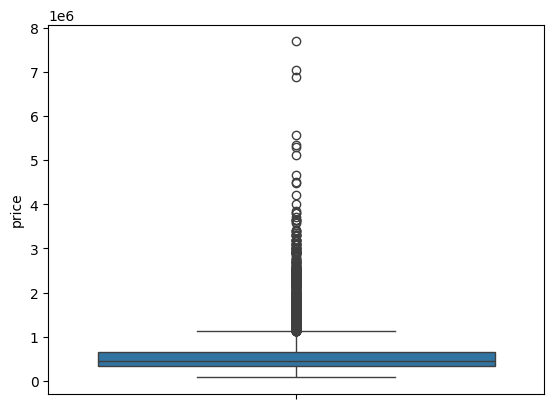

In [5]:
sbs.boxplot(df['price'])

<Axes: ylabel='sqft_living'>

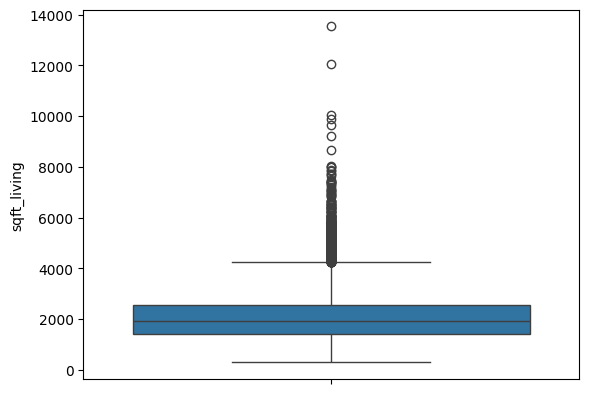

In [6]:
sbs.boxplot(df['sqft_living'])

#### Eliminarea valorilor anormale

In [7]:
#eliminare outlieri
def eliminare_outlieri(df, coloane):
    for coloana in coloane:
        print('Se lucreaza la coloana: {}'.format(coloana))
        Q1 = df[coloana].quantile(0.25)
        Q3 = df[coloana].quantile(0.75)
        IQR = Q3 - Q1
        min = Q1 - 1.5 * IQR
        max = Q3 + 1.5 * IQR
        df = df[(df[coloana] >= min) & (df[coloana] <= max)]
    return df

In [8]:
df = eliminare_outlieri(df, df.columns)
df

Se lucreaza la coloana: price
Se lucreaza la coloana: bedrooms
Se lucreaza la coloana: bathrooms
Se lucreaza la coloana: sqft_living
Se lucreaza la coloana: condition
Se lucreaza la coloana: grade
Se lucreaza la coloana: yr_built


,price,bedrooms,bathrooms,sqft_living,condition,grade,yr_built
0,221900.0,3,1.00,1180,3,7,1955
1,538000.0,3,2.25,2570,3,7,1951
2,180000.0,2,1.00,770,3,6,1933
3,604000.0,4,3.00,1960,5,7,1965
4,510000.0,3,2.00,1680,3,8,1987
...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3,8,2009
21609,400000.0,4,2.50,2310,3,8,2014
21610,402101.0,2,0.75,1020,3,7,2009
21611,400000.0,3,2.50,1600,3,8,2004


#### Separarea variabilelor independente de variabila dependentă

In [9]:
#X si y
x = df.drop('price', axis=1)
x

,bedrooms,bathrooms,sqft_living,condition,grade,yr_built
0,3,1.00,1180,3,7,1955
1,3,2.25,2570,3,7,1951
2,2,1.00,770,3,6,1933
3,4,3.00,1960,5,7,1965
4,3,2.00,1680,3,8,1987
...,...,...,...,...,...,...
21608,3,2.50,1530,3,8,2009
21609,4,2.50,2310,3,8,2014
21610,2,0.75,1020,3,7,2009
21611,3,2.50,1600,3,8,2004


In [10]:
y = df['price']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 18697, dtype: float64

#### Multicolinearitate

In [11]:
x.corr()

,bedrooms,bathrooms,sqft_living,condition,grade,yr_built
bedrooms,1.000000,0.455704,0.594257,0.030996,0.296484,0.148935
bathrooms,0.455704,1.000000,0.672415,-0.132065,0.580528,0.542094
sqft_living,0.594257,0.672415,1.000000,-0.046590,0.633847,0.313854
condition,0.030996,-0.132065,-0.046590,1.000000,-0.166892,-0.365345
grade,0.296484,0.580528,0.633847,-0.166892,1.000000,0.471979
yr_built,0.148935,0.542094,0.313854,-0.365345,0.471979,1.000000


<Axes: >

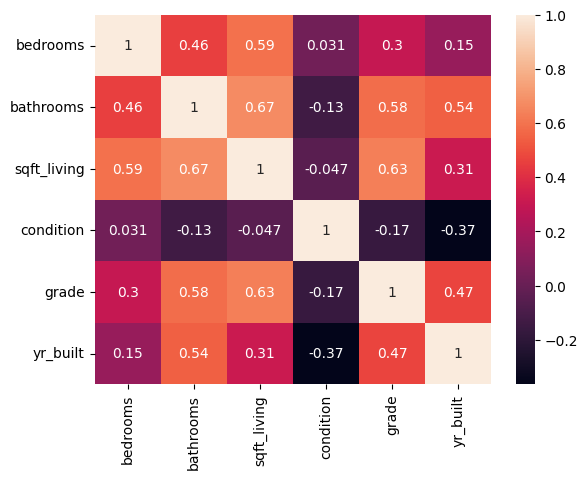

In [12]:
sbs.heatmap(x.corr(), annot=True)

#### Împărțirea datelor în set de antrenare și de test

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
x_train

,bedrooms,bathrooms,sqft_living,condition,grade,yr_built
17691,3,2.50,2160,3,7,2007
15980,3,2.50,3230,4,8,1964
18690,5,2.50,2210,3,8,1976
12272,4,1.75,1500,5,7,1901
13602,5,3.00,2257,3,8,2005
...,...,...,...,...,...,...
6588,2,1.00,1170,4,7,1920
9229,5,2.50,2530,4,8,1976
20495,2,2.00,1110,3,7,2008
20706,2,1.75,1120,3,7,2012


In [21]:
x_train

,bedrooms,bathrooms,sqft_living,condition,grade,yr_built
17691,3,2.50,2160,3,7,2007
15980,3,2.50,3230,4,8,1964
18690,5,2.50,2210,3,8,1976
12272,4,1.75,1500,5,7,1901
13602,5,3.00,2257,3,8,2005
...,...,...,...,...,...,...
6588,2,1.00,1170,4,7,1920
9229,5,2.50,2530,4,8,1976
20495,2,2.00,1110,3,7,2008
20706,2,1.75,1120,3,7,2012


In [22]:
x_test

,bedrooms,bathrooms,sqft_living,condition,grade,yr_built
16896,4,2.50,2070,3,7,1996
10214,4,1.75,1980,4,8,1953
5407,3,2.00,1090,3,7,1940
5944,3,2.25,1445,3,7,2003
10306,2,2.00,1690,3,7,1906
...,...,...,...,...,...,...
3058,4,2.50,2350,4,8,1987
8256,2,1.00,1140,3,6,1911
15268,3,3.25,1600,3,8,1998
6159,3,2.25,1780,3,8,1967


#### Antrenarea modelului de regresie

In [23]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

#### Aflarea ecuației modelului de regresie

In [27]:
# intercept
print(lm.intercept_)

4676112.300712095


In [28]:
#coeficienti
print(lm.coef_)

[-2.49594828e+04  4.38199013e+04  9.61502420e+01  1.33306242e+04
  1.09002403e+05 -2.67026844e+03]


In [31]:
coeficienti=pd.DataFrame(lm.coef_, x.columns)
coeficienti.columns=['coeficienti']
coeficienti

,coeficienti
bedrooms,-24959.482825
bathrooms,43819.901293
sqft_living,96.150242
condition,13330.624215
grade,109002.403295
yr_built,-2670.268438


#### Predicția datelor pe setul de test

In [32]:
y_pred=lm.predict(x_test)

Text(0, 0.5, 'y Pred')

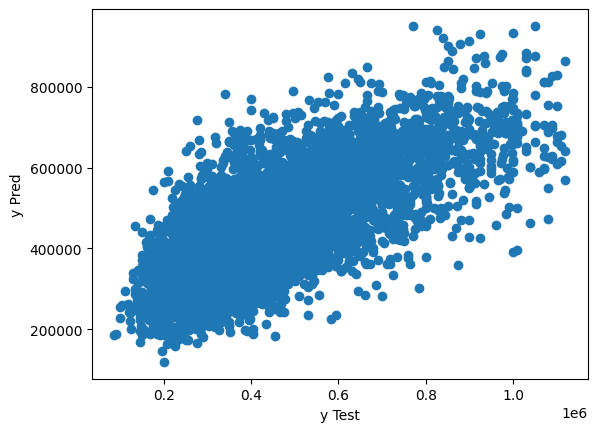

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel('y Test')
plt.ylabel('y Pred')

C:\Users\cosmi\AppData\Local\Temp\ipykernel_20412\1167120177.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbs.distplot(y_pred, y_test)


ValueError: `bins` must increase monotonically, when an array

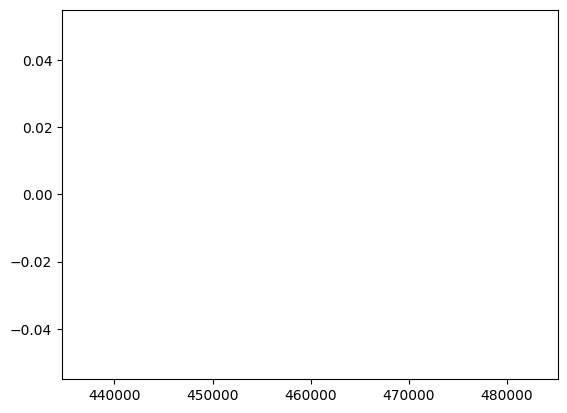

In [38]:
sbs.distplot(y_pred-y_test)

#### Aflarea metricilor specifice modelului de regresie

In [36]:
#MAE, MSE, RMSE, R^2
from sklearn import metrics
print('MSE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2: ', metrics.r2_score(y_test, y_pred))

MSE:  106727.74938565936
MSE:  18727717300.434345
RMSE:  136849.25027355592
R^2:  0.5039994712831976


#### Exemplu de predictie

In [37]:
# 3, 1.00 ,1280, 3, 7, 2000
lm.predict([[3, 1.00 ,1280, 3, 7, 2000]])

D:\Program_Files\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([230597.88254342])